Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


На мой взгляд типы данных везде верные. Столбцу average_flights в query_3 можно было бы сделать int с округланием до целых, но мне кажется в этом мало смысла. Т.к. на мой взгляд делать округление проще после всех расчетов по требованию. 

##### Топ 10 городов по количеству рейсов 

In [3]:
top_cities = query_3.sort_values(by = ['average_flights'], ascending = False).head(10)
top_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


##### модели самолётов и количество рейсов

In [ ]:
#словарь для параметра fontdict метода matplotlib.axes.Axes.set_xticklabels
# можно просто брать ключи словаря и писать, как отдельные параметры set_xticklables, как сделал ниже
label_params = {'fontsize': 4,
 'fontweight': rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': loc}

In [5]:
sns.set(style="whitegrid")

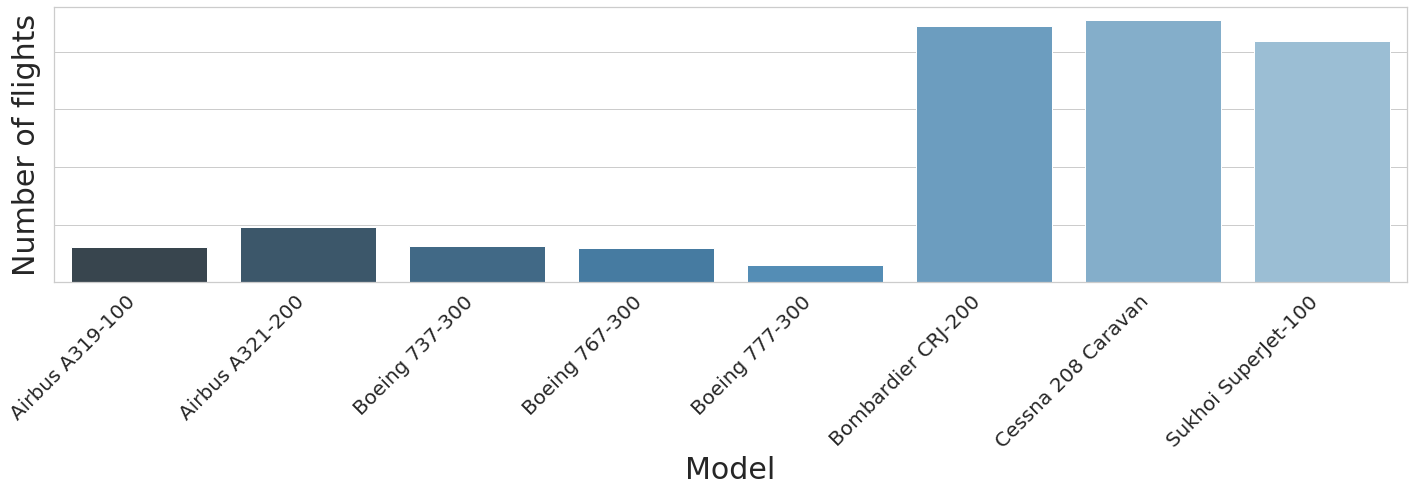

In [30]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.barplot(x="model", y="flights_amount",data=query_1, palette="Blues_d", ax = ax)
ax.set_xlabel("Model",fontsize=30)
ax.set_ylabel("Number of flights",fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize= 20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize= 40)
plt.tight_layout()
plt.show()

##### города и количество рейсов

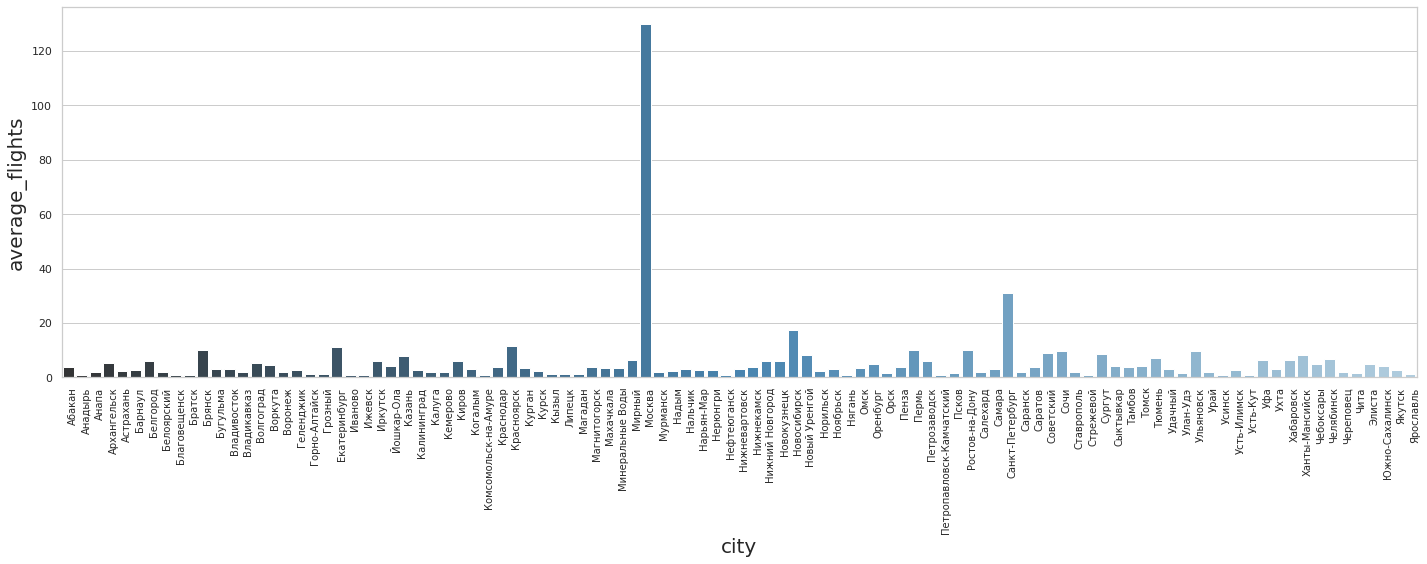

In [56]:
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.barplot(x="city", y="average_flights", data=query_3, palette="Blues_d", ax = ax)
ax.set_xlabel("city",fontsize=20)
ax.set_ylabel("average_flights",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, horizontalalignment='left', fontsize= 10)
plt.tight_layout()
plt.show()

##### топ-10 городов и количество рейсов

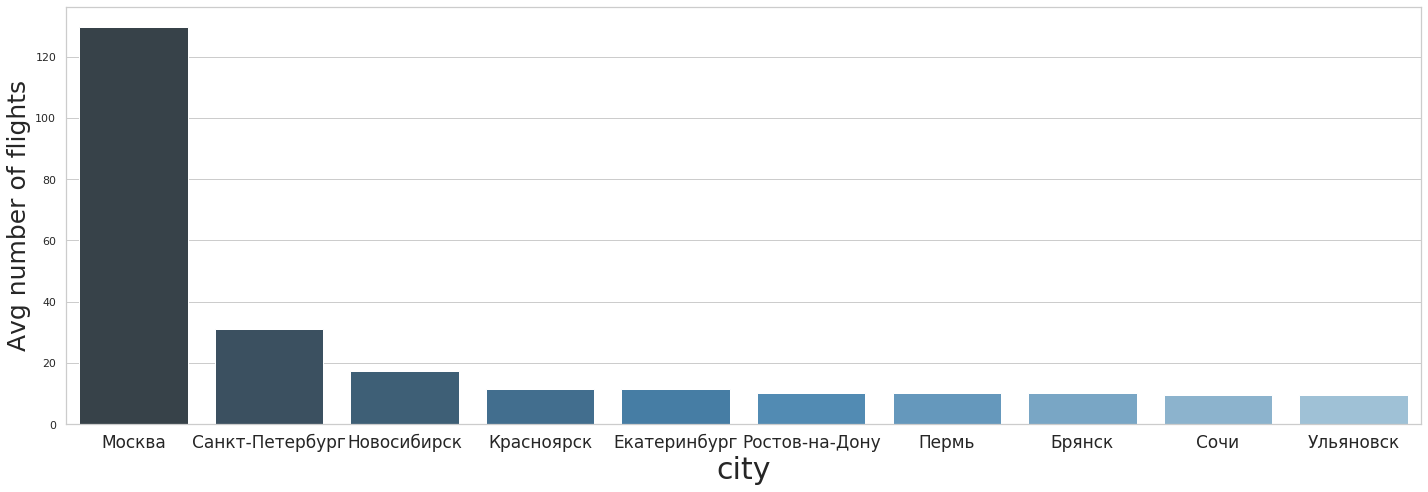

In [55]:

fig, ax = plt.subplots(figsize = (20,7))
ax = sns.barplot(x="city", y="average_flights", data=top_cities, palette="Blues_d", ax = ax)
ax.set_xlabel('city', fontsize = 30)
ax.set_ylabel('Avg number of flights', fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 17)
plt.tight_layout()
plt.show()

### Вывод

1.Наиболее ходовые модели самолетов : Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi Superjet-100. Только эти три модели преодалели порог в 4000 рейсов. Все остальные модели налетали менее 1000 рейсов. Лидер в сфере аэроперевозок - Cessna 208 Caravan (более 4500 рейсов)   

2.Среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года для всех городов России кроме Москвы и Санкт-Петербурга составило менее 20.     

3.В топ 10 по среднему количеству рейсов в день попали такие города : Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Перьмь, Брянск, Сочи и Ульяновск. В топ 3 вошли Москва, Спб и Новосибирск. В Москве в среднем более 130 рейсов в день, затем идет СПб с ~30 и Новосибирск с ~ 20. Закрывает топ 10 Ульяновск с ~ 10 рейсами в день    

# 2. Проверка гипотезы

In [74]:
query_last = pd.read_csv('/datasets/query_last.csv')

In [84]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    10 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [75]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [79]:
query_last['festival_week'] = query_last['festival_week'].fillna(0)

In [80]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,0.0,NaN
3,33,51378,0.0,NaN
4,34,51492,0.0,NaN
5,35,51360,0.0,NaN
6,36,51386,36.0,Видфест
7,37,51670,0.0,NaN
8,38,51518,0.0,NaN
9,39,51623,0.0,NaN


In [82]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,0.0,NaN
3,33,51378,0.0,NaN
4,34,51492,0.0,NaN
5,35,51360,0.0,NaN
6,36,51386,36.0,Видфест
7,37,51670,0.0,NaN
8,38,51518,0.0,NaN
9,39,51623,0.0,NaN


In [92]:
tickets_on_fest = query_last[query_last['festival_week'] > 0]
tickets_on_fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [93]:
tickets_without_fest = query_last[query_last['festival_week'] == 0]
tickets_without_fest

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,0.0,NaN
3,33,51378,0.0,NaN
4,34,51492,0.0,NaN
5,35,51360,0.0,NaN
7,37,51670,0.0,NaN
8,38,51518,0.0,NaN
9,39,51623,0.0,NaN


In [98]:
fest_num_array = tickets_on_fest['ticket_amount'].values
common_num_array = tickets_without_fest['ticket_amount'].values

In [103]:
alpha = 0.05 # критический уровень статистической значимости
            
results = st.ttest_ind(equal_var= True,
    fest_num_array, 
    common_num_array)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


## Вывод

Гипотеза НЕ отвергается. H0 о равенстве средних не отвергается =>  есть основания пологать, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время